In [19]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm  
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_excel('경파.xlsx')
df=df.set_index('Region')
df

,restaurant,population,single,crosswalk,floating,car_acci,motor_acci
Region,,,,,,,
종로구,148,153684,25983,1094,20357,903,136
중구,105,131450,22818,1366,45521,955,153
용산구,116,236518,36881,1066,26106,890,99
성동구,86,291609,42585,1170,39027,1119,163
광진구,166,353110,62301,1008,50823,869,157
동대문구,162,352592,60925,1361,66054,1448,301
중랑구,148,393600,56605,1544,51360,1447,244
성북구,148,442680,61510,1861,42405,1275,193
강북구,120,300824,45685,1264,34563,1087,214


In [20]:
df.describe()

,restaurant,population,single,crosswalk,floating,car_acci,motor_acci
count,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000
mean,164.440000,389304.680000,55628.04000,1515.360000,38601.200000,1409.040000,203.560000
std,48.192392,126085.700172,21245.60661,467.670636,10971.870841,670.985189,79.229666
min,86.000000,131450.000000,22818.00000,916.000000,19960.000000,741.000000,99.000000
25%,143.000000,317075.000000,42585.00000,1094.000000,30469.000000,953.000000,153.000000
50%,156.000000,394649.000000,56438.00000,1512.000000,39027.000000,1275.000000,190.000000
75%,182.000000,465097.000000,63172.00000,1861.000000,45316.000000,1448.000000,243.000000
max,322.000000,668261.000000,129233.00000,2688.000000,66054.000000,3751.000000,428.000000


<AxesSubplot:xlabel='Region'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47928 missing from c

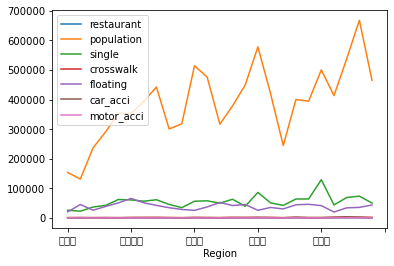

In [40]:
df.plot()

In [21]:
df.corr()

,restaurant,population,single,crosswalk,floating,car_acci,motor_acci
restaurant,1.000000,0.737136,0.472706,0.743189,-0.107546,0.850334,0.730009
population,0.737136,1.000000,0.679329,0.632022,-0.016691,0.613282,0.592061
single,0.472706,0.679329,1.000000,0.209455,0.182348,0.361344,0.527199
crosswalk,0.743189,0.632022,0.209455,1.000000,-0.105474,0.837867,0.670829
floating,-0.107546,-0.016691,0.182348,-0.105474,1.000000,-0.090589,0.190547
car_acci,0.850334,0.613282,0.361344,0.837867,-0.090589,1.000000,0.877578
motor_acci,0.730009,0.592061,0.527199,0.670829,0.190547,0.877578,1.000000


In [23]:
df['ln_restaurant']=df['restaurant'].map(np.log)
df['ln_population']=df['population'].map(np.log)
df['ln_single']=df['single'].map(np.log)
df['ln_crosswalk']=df['crosswalk'].map(np.log)
df['ln_floating']=df['floating'].map(np.log)
df['ln_car_acci']=df['car_acci'].map(np.log)
df['ln_motor_acci']=df['motor_acci'].map(np.log)


df_log=df[['ln_restaurant', 'ln_population', 'ln_single', 'ln_crosswalk', 'ln_floating', 'ln_car_acci', 'ln_motor_acci']]
df=df[['restaurant', 'population', 'single', 'crosswalk', 'floating', 'car_acci', 'motor_acci']]
df_log

,ln_restaurant,ln_population,ln_single,ln_crosswalk,ln_floating,ln_car_acci,ln_motor_acci
Region,,,,,,,
종로구,4.997212,11.942654,10.165198,6.997596,9.921180,6.805723,4.912655
중구,4.653960,11.786382,10.035305,7.219642,10.725929,6.861711,5.030438
용산구,4.753590,12.373780,10.515452,6.971669,10.169920,6.791221,4.595120
성동구,4.454347,12.583169,10.659257,7.064759,10.572009,7.020191,5.093750
광진구,5.111988,12.774535,11.039733,6.915723,10.836104,6.767343,5.056246
동대문구,5.087596,12.773067,11.017399,7.215975,11.098228,7.277939,5.707110
중랑구,4.997212,12.883090,10.943853,7.342132,10.846615,7.277248,5.497168
성북구,4.997212,13.000602,11.026955,7.528869,10.655022,7.150701,5.262690
강북구,4.787492,12.614281,10.729525,7.142037,10.450539,6.991177,5.365976


<AxesSubplot:xlabel='Region'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47928 missing from c

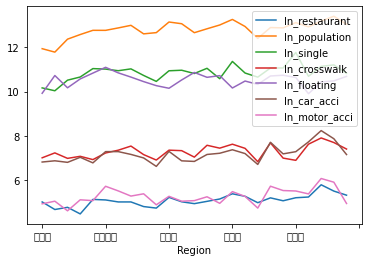

In [24]:
df_log.plot()

<AxesSubplot:>

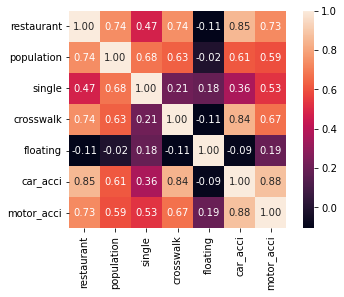

In [25]:
sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10
})

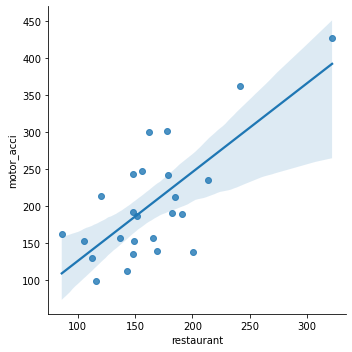

In [27]:
sns.lmplot(data = df, x = 'restaurant', y = 'motor_acci')

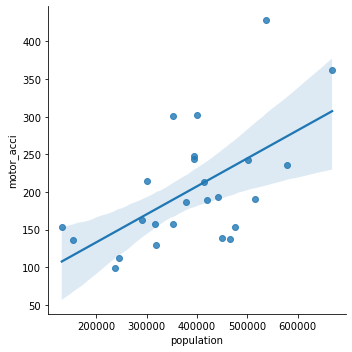

In [28]:
sns.lmplot(data = df, x = 'population', y = 'motor_acci')

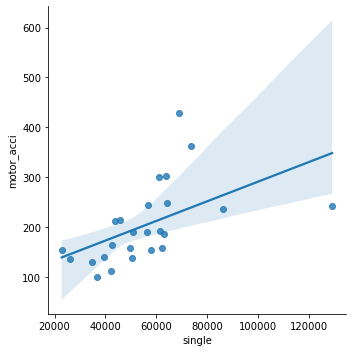

In [29]:
sns.lmplot(data = df, x = 'single', y = 'motor_acci')

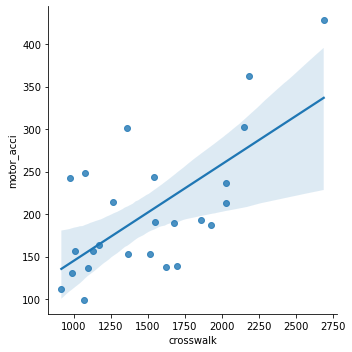

In [30]:
sns.lmplot(data = df, x = 'crosswalk', y = 'motor_acci')

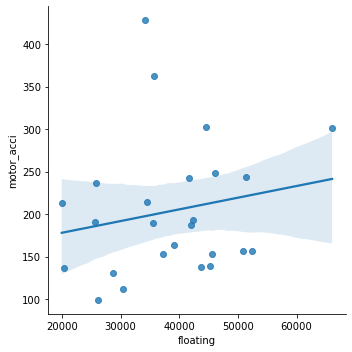

In [31]:
sns.lmplot(data = df, x = 'floating', y = 'motor_acci')

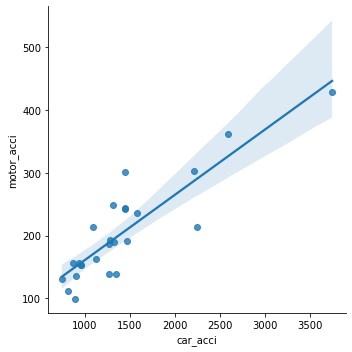

In [32]:
sns.lmplot(data = df, x = 'car_acci', y = 'motor_acci')

<AxesSubplot:xlabel='Region of Seoul', ylabel='number of~'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47928 missing from c

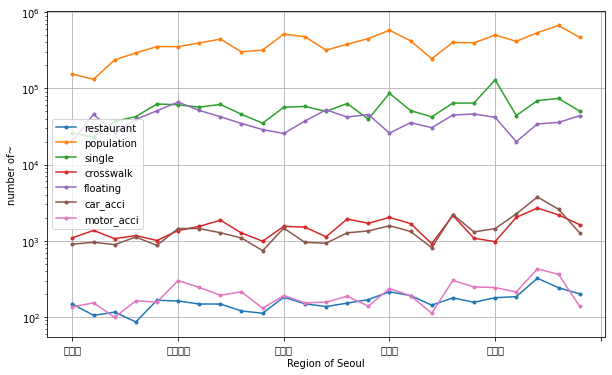

In [33]:
df.plot(logy=True, figsize=(10,6), grid=True, xlabel="Region of Seoul", ylabel="number of~", marker='o', ms=3)

In [34]:
from statsmodels.regression.linear_model import OLS

result = sm.ols(formula = 'motor_acci ~ restaurant + population + single + crosswalk + car_acci', data = df).fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:             motor_acci   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     19.62
Date:                Sun, 12 Jun 2022   Prob (F-statistic):           6.56e-07
Time:                        12:04:48   Log-Likelihood:                -121.54
No. Observations:                  25   AIC:                             255.1
Df Residuals:                      19   BIC:                             262.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.4006     36.340      1.525      0.1